<a href="https://colab.research.google.com/github/rananasser760/Crop_Recommendation_ML_project/blob/main/Copy_of_Agriculture_project_Rana_Nasser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import all libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#read data file
data = pd.read_csv("Crop_recommendation.csv")

Crop_recommendation

N = Nitrogen
   P = phosphorous
   K = Potassium
  Temperature=The average soil temperatures for bioactivity range from 50 to 75F.
   Ph = A scale used to identify acidity or basicity nature; (Acid Nature- Ph<7; Neutral- Ph=7; Base Nature-P>7)
   label = Types of Crop (Rice,Maize, Chickpea; Kidney beans; pigeonpeas; mothbeans; mungbean;blackgram; lentil; pomegranate; banana; mango; grapes; watermelon; muskmelon; apple; orange;papaya; coconut; cotton; jute; coffee)[link text](https://)

In [ ]:
#show the first 10 rows
data.head(10)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
5,69,37,42,23.058049,83.370118,7.073454,251.055000,rice
6,69,55,38,22.708838,82.639414,5.700806,271.324860,rice
7,94,53,40,20.277744,82.894086,5.718627,241.974195,rice
8,89,54,38,24.515881,83.535216,6.685346,230.446236,rice
9,68,58,38,23.223974,83.033227,6.336254,221.209196,rice


In [ ]:
#number of rows and columns
data.shape

(2200, 8)

In [ ]:
#names of columns
data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [ ]:
#information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
#the number of unique value in label column
print(data['label'].nunique())
#the names of unique value in label column
print(data['label'].unique())

22
['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


In [ ]:
#the count of each value in label column
print(pd.value_counts(data['label']))

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64


In [ ]:
#check if the data is null and count the number of nulls
print(data.isnull().sum())

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


In [ ]:
#describe the data and print max,min,mean,count, .... etc ....
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


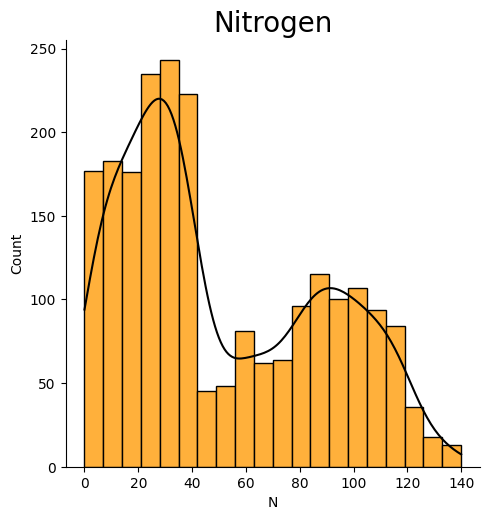

In [ ]:
#Histogram of N column
sns.displot(x=data['N'], bins=20,kde=True,edgecolor="black",color='black',facecolor='#ffb03b')
plt.title("Nitrogen",size=20)
plt.show()

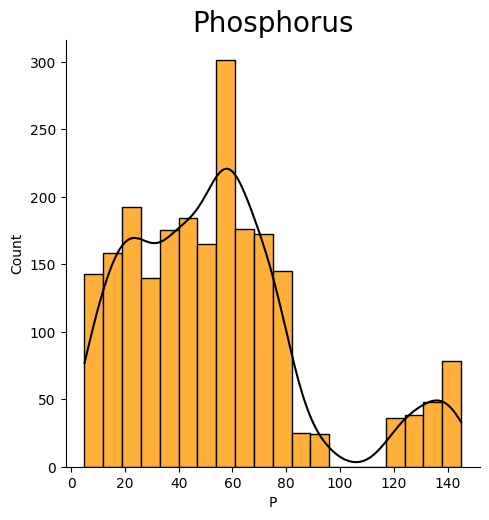

In [ ]:
#Histogram of P column
sns.displot(x=data['P'],bins=20,color='black',edgecolor='black',kde=True,facecolor='#ffb03b')
plt.title("Phosphorus", size=20)
plt.show()

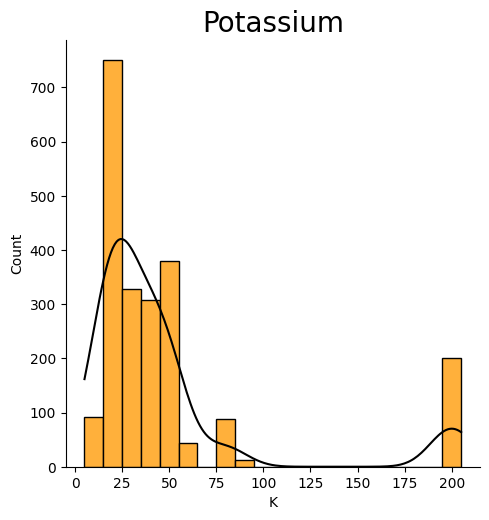

In [ ]:
#Histogram of K column
sns.displot(x=data['K'],kde=True, bins=20, facecolor='#ffb03b',edgecolor='black', color='black')
plt.title("Potassium",size=20)
plt.show()

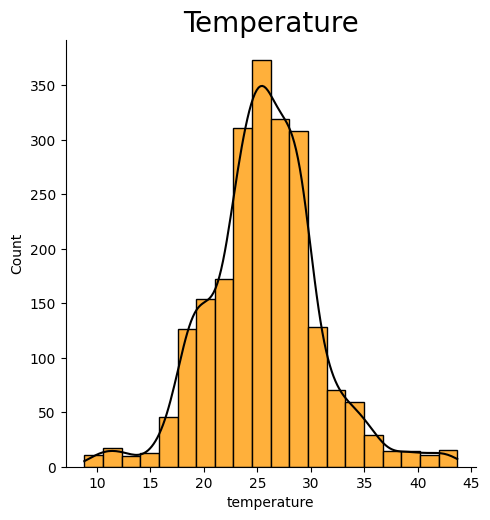

In [ ]:
#Histogram of temperature column
sns.displot(x=data['temperature'], bins=20,kde=True,edgecolor="black",color='black',facecolor='#ffb03b')
plt.title("Temperature",size=20)
plt.show()

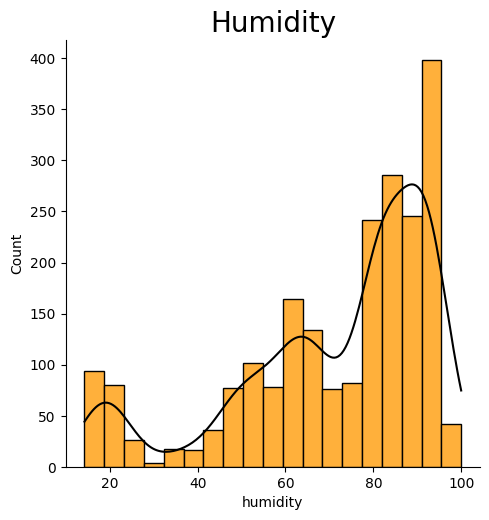

In [ ]:
#Histogram of humidity column
sns.displot(x=data['humidity'], color='black',facecolor='#ffb03b',kde=True,edgecolor='black')
plt.title("Humidity",size=20)
plt.show()

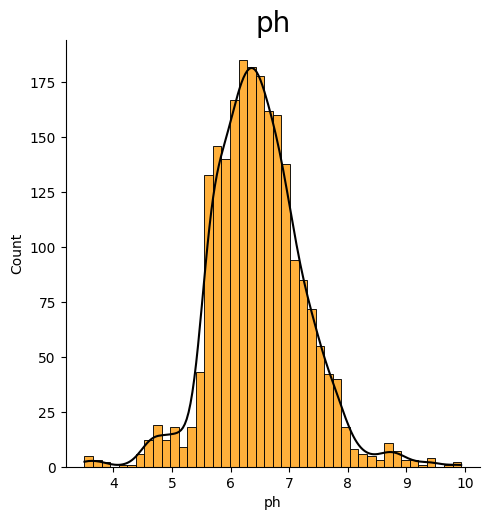

In [ ]:
#Histogram of ph column
sns.displot(x=data['ph'], color='black',facecolor='#ffb03b',kde=True,edgecolor='black')
plt.title("ph",size=20)
plt.show()

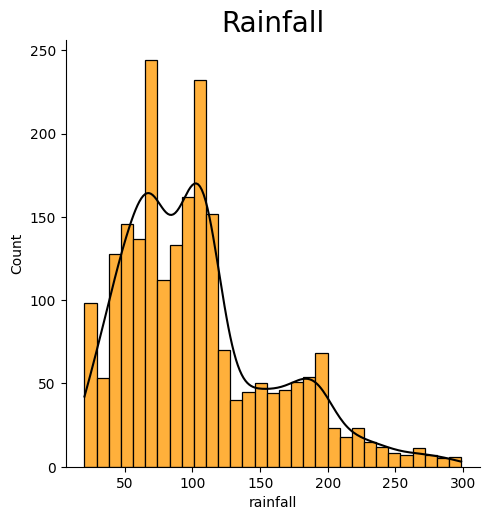

In [ ]:
#Histogram of rainfall column
sns.displot(x=data['rainfall'], color='black',facecolor='#ffb03b',kde=True,edgecolor='black')
plt.title("Rainfall",size=20)
plt.show()

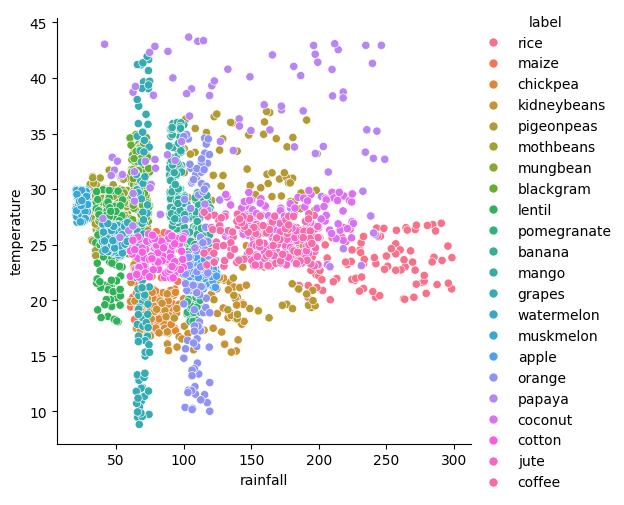

In [ ]:
sns.relplot(x='rainfall',y='temperature',data=data,kind='scatter',hue='label',height=5)
plt.show()

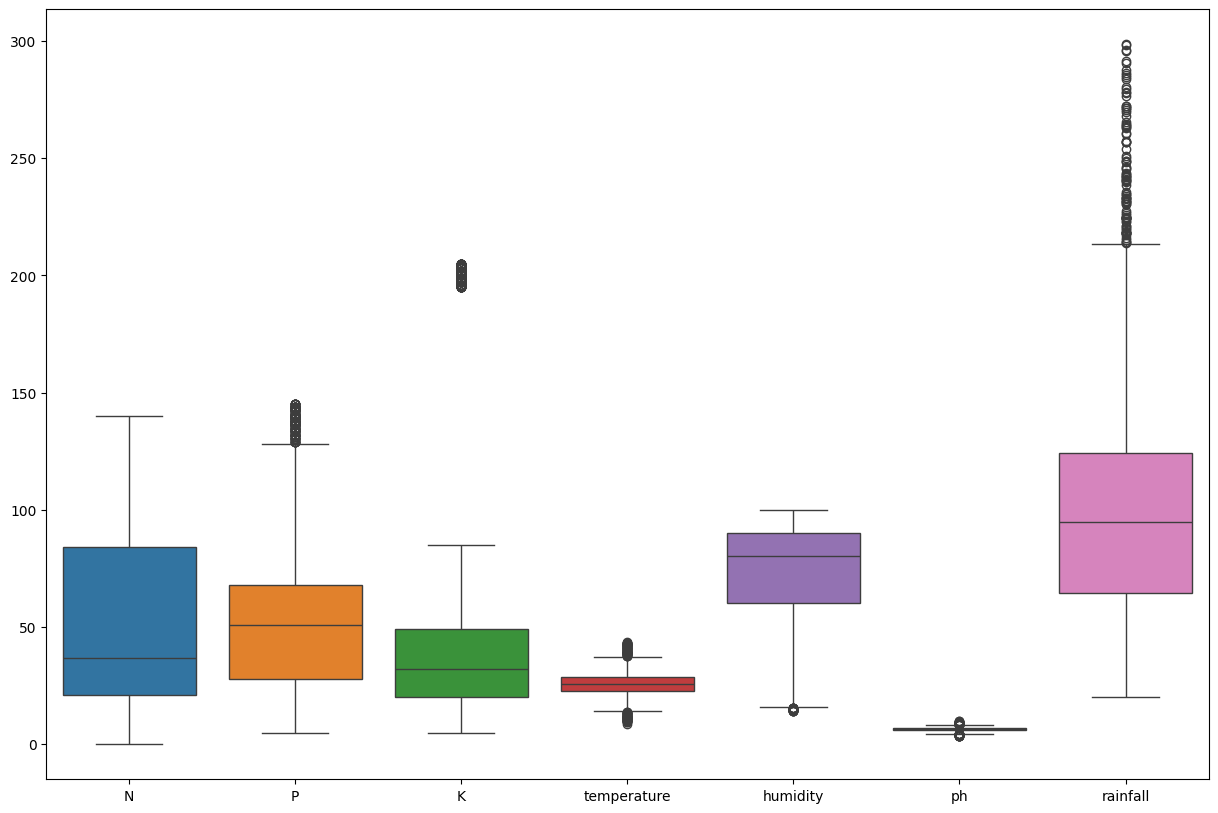

In [ ]:
#Outlires (BoxPlot)
plt.figure(figsize=(15,10))
sns.boxplot(data = data)
plt.show()

In [ ]:
#knowing number of nulls in every column
print(data.isnull().sum())

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


In [ ]:
#the percentage of the null values
print(data.isnull().sum()/len(data) * 100)

N              0.0
P              0.0
K              0.0
temperature    0.0
humidity       0.0
ph             0.0
rainfall       0.0
label          0.0
dtype: float64


In [ ]:
#print all datatypes of objects
data.select_dtypes(include=['object']).columns

Index(['label'], dtype='object')

In [ ]:
#Encoding
from sklearn import preprocessing
label_encoding=preprocessing.LabelEncoder()
cols=['label']
for i in cols:
    data[i]=label_encoding.fit_transform(data[i])

In [ ]:
#information about the data like the datatype,columns,non-null values,entries(rows)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 137.6 KB


In [ ]:
#check outlires
columns = ['N','P', 'K','temperature','humidity','rainfall','label']

for i in columns:
    q1 = np.percentile(data[i], 25)
    q3 = np.percentile(data[i], 75)
    norm_range = (q3 - q1) * 1.5

    # Identify lower outliers
    lower_outliers = data[data[i] < (q1 - norm_range)]

    # Identify upper outliers
    upper_outliers = data[data[i] > (q3 + norm_range)]

    # Count the total number of outliers
    outliers = len(lower_outliers) + len(upper_outliers)

    print(f"The number of outliers in {i}: {outliers}")

    # Replace outliers with adjusted values
    data[i] = np.where(data[i] < (q1 - norm_range), q1 - norm_range, data[i])
    data[i] = np.where(data[i] > (q3 + norm_range), q3 + norm_range, data[i])

The number of outliers in N: 0
The number of outliers in P: 138
The number of outliers in K: 200
The number of outliers in temperature: 86
The number of outliers in humidity: 30
The number of outliers in rainfall: 100
The number of outliers in label: 0


In [ ]:
columns = ['N','P', 'K','temperature','humidity','rainfall','label']

for i in columns:
    q1 = np.percentile(data[i], 25)
    q3 = np.percentile(data[i], 75)
    norm_range = (q3 - q1) * 1.5

    # Identify lower outliers
    lower_outliers = data[data[i] < (q1 - norm_range)]

    # Identify upper outliers
    upper_outliers = data[data[i] > (q3 + norm_range)]

    # Count the total number of outliers
    outliers = len(lower_outliers) + len(upper_outliers)

    print(f"The number of outliers in {i}: {outliers}")

The number of outliers in N: 0
The number of outliers in P: 0
The number of outliers in K: 0
The number of outliers in temperature: 0
The number of outliers in humidity: 0
The number of outliers in rainfall: 0
The number of outliers in label: 0


In [ ]:
#check duplicates
data.duplicated().sum()

0

In [ ]:
#making correlation
data.corr()

,N,P,K,temperature,humidity,ph,rainfall,label
N,1.000000,-0.227834,0.019000,0.023850,0.190746,0.096683,0.044041,-0.031130
P,-0.227834,1.000000,0.561850,-0.132569,-0.138850,-0.132720,-0.063986,-0.492414
K,0.019000,0.561850,1.000000,-0.164312,0.120765,-0.101339,-0.026358,-0.288385
temperature,0.023850,-0.132569,-0.164312,1.000000,0.212362,-0.021698,-0.041047,0.111306
humidity,0.190746,-0.138850,0.120765,0.212362,1.000000,-0.008130,0.085163,0.193551
ph,0.096683,-0.132720,-0.101339,-0.021698,-0.008130,1.000000,-0.116400,-0.012253
rainfall,0.044041,-0.063986,-0.026358,-0.041047,0.085163,-0.116400,1.000000,0.009406
label,-0.031130,-0.492414,-0.288385,0.111306,0.193551,-0.012253,0.009406,1.000000


<Axes: >

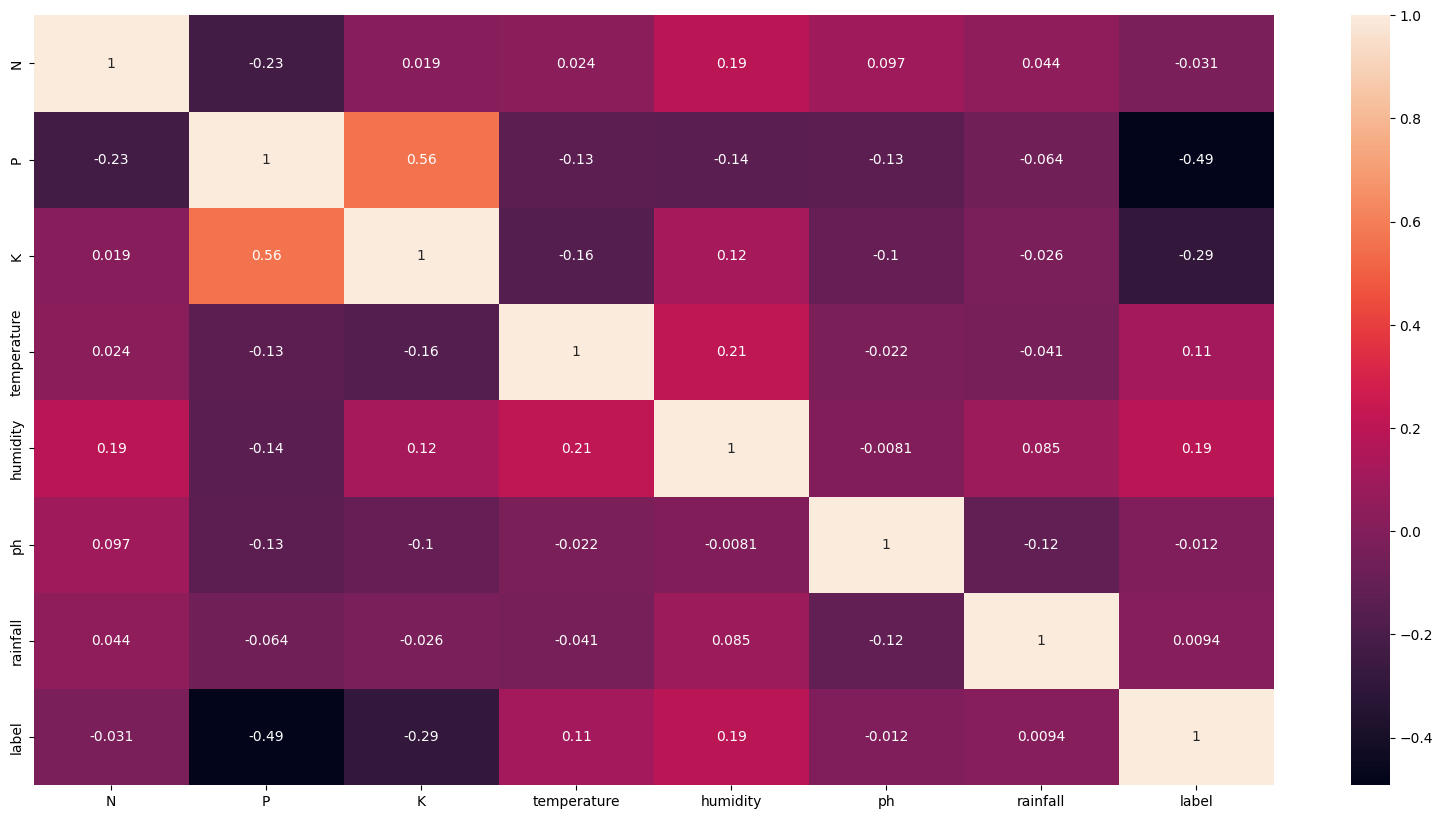

In [ ]:
#making correlation on the data
fig = plt.subplots(figsize=(20, 10))
sns.heatmap(data.corr(),annot = True)

In [ ]:
#knowing how many columns have high or low or bad correlation
high_corr = []
low_corr = []
bad_corr = []
for col in data.columns:
    relation = data['label'].corr(data[col])
    if(relation > 0):
        if relation >= 0.7 and relation <= 1 :
      # print(f"relation between {col} & diagnosis is high positive \n {relation}")
               high_corr.append(col)
        elif relation >= 0.4 and relation < 0.7 :
      # print(f"relation between {col} & diagnosis is low positive \n {relation}")
                 low_corr.append(col)
        else:    bad_corr.append(col)# print(f"relation between {col} & diagnosis is very low positive \n {relation}")
    else:
        if relation <= -0.7 and relation > -1 :
      # print(f"relation between {col} & diagnosis is high negative \n {relation}")
               high_corr.append(col)
        elif relation <= -0.4 and relation > -0.7 :
      # print(f"relation between {col} & diagnosis is low negative \n {relation}")
                low_corr.append(col)
        else:    bad_corr.append(col)# print(f"relation between {col} & diagnosis is very low negative \n {relation}")

print(f"the high corr are {high_corr}")
print(f"the low corr are {low_corr}")
print(f"the bad corr are {bad_corr}")

the high corr are ['label']
the low corr are ['P']
the bad corr are ['N', 'K', 'temperature', 'humidity', 'ph', 'rainfall']


In [ ]:
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import BaggingClassifier

In [ ]:
x = data.drop(columns=['label'])
y = data['label']

In [ ]:
#Splitting data into train & test
from sklearn.model_selection import train_test_split , GridSearchCV
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/5, random_state = 42)

In [ ]:
x_train,x_test,y_train,y_test = model_selection.train_test_split(x,y)
print(len(x_train),len(y_train),len(x_test),len(y_test))

1650 1650 550 550


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
#KNN model
wss=[]
for k in range (2,20,2):
    knn= KNeighborsClassifier(n_neighbors=k)
    knn=knn.fit(x_train,y_train)
    s=knn.score(x_test, y_test)
    wss.append(s)

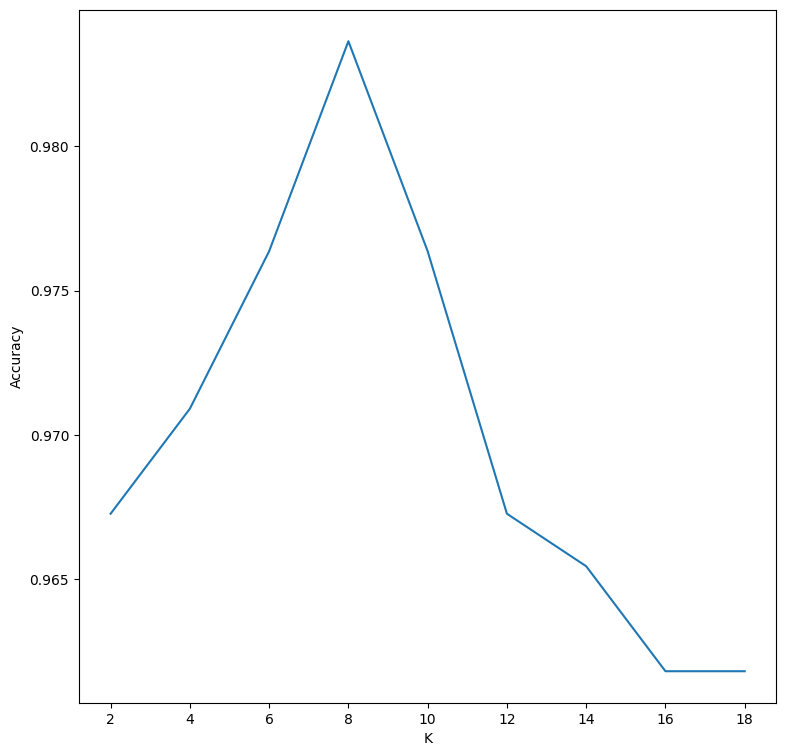

In [ ]:
plt.figure(figsize=(9,9))
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.plot(range(2,20,2),wss)

In [ ]:
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors=8)
scores_knn = cross_val_score(knn, x_train, y_train, cv=10,scoring="accuracy")
print("KNN Accuracy:",scores_knn.mean()*100)

KNN Accuracy: 97.63636363636363


In [ ]:
knn.fit(x_train,y_train)
y_prd_knn=knn.predict(x_test)
cr=classification_report(y_test, y_prd_knn)
print(cr)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        24
         1.0       1.00      1.00      1.00        21
         2.0       0.92      0.96      0.94        24
         3.0       1.00      1.00      1.00        28
         4.0       1.00      1.00      1.00        23
         5.0       1.00      1.00      1.00        28
         6.0       1.00      1.00      1.00        26
         7.0       1.00      1.00      1.00        31
         8.0       0.84      1.00      0.91        21
         9.0       0.97      1.00      0.99        33
        10.0       0.96      0.92      0.94        24
        11.0       1.00      1.00      1.00        23
        12.0       0.93      1.00      0.97        14
        13.0       1.00      0.96      0.98        24
        14.0       1.00      1.00      1.00        23
        15.0       1.00      1.00      1.00        26
        16.0       1.00      1.00      1.00        22
        17.0       1.00    

In [ ]:
#Decisin Tree model
acc1=[]
acc2=[]
for i in range (2,16):
    dtc1=DecisionTreeClassifier(max_depth=i,criterion="entropy",random_state=42)
    dtc1.fit(x_train,y_train)
    dtc2=DecisionTreeClassifier(max_depth=i,criterion="gini",random_state=42)
    dtc2.fit(x_train,y_train)
    acc1.append(dtc1.score(x_test, y_test))
    acc2.append(dtc2.score(x_test, y_test))

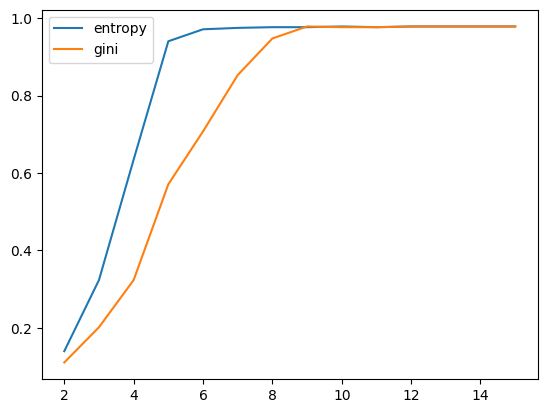

In [ ]:
plt.plot(range(2,16),acc1,label="entropy")
plt.plot(range(2,16),acc2,label="gini")
plt.legend()

In [ ]:
clf = DecisionTreeClassifier(criterion='gini', max_depth = 9 , random_state = 42)
clf = clf.fit(x_train , y_train)
y_pred_test = clf.predict(x_test)

y_pred_train = clf.predict(x_train)
y_pred_train

print ('Decision_Tree Accuracy_Train: {0:0.4f}'. format (accuracy_score(y_train,y_pred_train)*100))
print ('Decision_Tree Accuracy_Test: {0:0.4f}'. format (accuracy_score(y_pred_test,y_test)*100))

Decision_Tree Accuracy_Train: 99.8182
Decision_Tree Accuracy_Test: 97.6364


In [ ]:
from sklearn.model_selection import cross_val_score
scores_dt = cross_val_score(clf, x_train, y_train, cv=10,scoring="accuracy")
print("Mean of DT:" ,scores_dt.mean()*100)

Mean of DT: 98.9090909090909


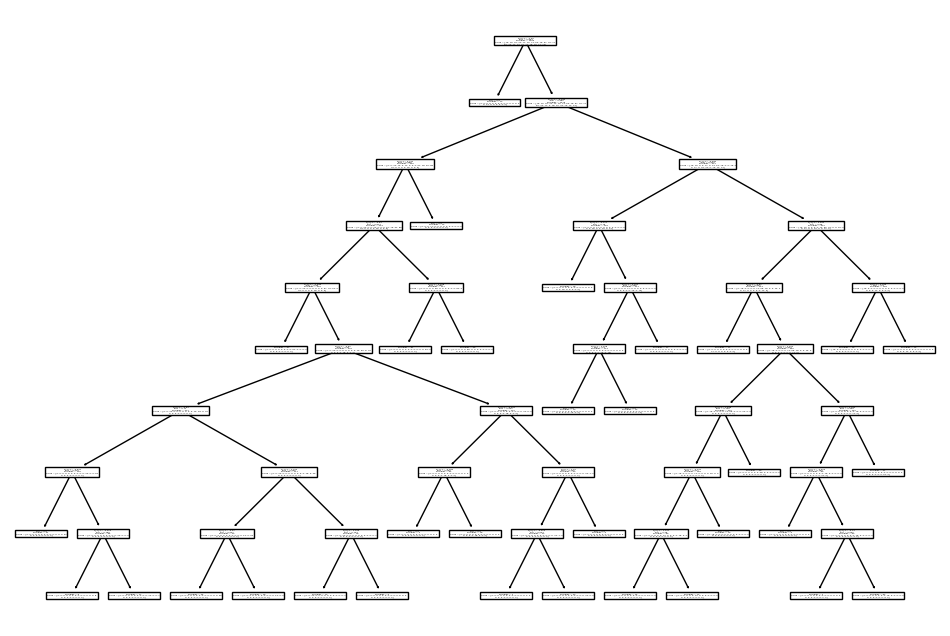

In [ ]:
from sklearn import tree
plt.figure (figsize=(12,8))
tree.plot_tree (clf.fit(x_train , y_train))
plt.show()

In [ ]:
# Define the hyperparameter grid
param_grid = {'C': [0.1, 1, 10, 100]}  # Regularization parameter
svm = SVC()

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=15)

# Perform grid search cross-validation
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
accuracy1 = accuracy_score(y_test, y_pred)
print("SVM Accuracy: ", accuracy1*100)

Best Hyperparameters: {'C': 100}
SVM Accuracy:  98.36363636363636


In [ ]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=0)
random_forest.fit(x_train, y_train)
# Predict on the test data
y_pred = random_forest.predict(x_test)

# Calculate accuracy
accuracy2 = accuracy_score(y_test, y_pred)
print("Random_Forest Accuracy: ", accuracy2*100)

Random_Forest Accuracy:  99.27272727272727


In [ ]:
# Creating a dictionary with the accuracy scores
accuracy_data = {
    'Model': ['KNN', 'SVM', 'Decision Tree', 'Random Forest'],
    'Accuracy': [scores_knn.mean()*100, accuracy1*100, scores_dt.mean()*100, accuracy2*100]
}

# Creating a DataFrame from the dictionary
accuracy_df = pd.DataFrame(accuracy_data)

# Printing the DataFrame
print(accuracy_df)

           Model   Accuracy
0            KNN  97.636364
1            SVM  98.363636
2  Decision Tree  98.909091
3  Random Forest  99.272727
